In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file1 = open('ob-la-di_ob-la-da.txt', 'r')

happy = 0;
angry = 0;
surprise = 0;
sad = 0;
fear = 0;
neu = 0;
lines = 0;
 
# Rating each line
for line in file1:
    b = line.strip()
    score = te.get_emotion(b)
    if b != "" :
        lines += 1
        print("{}\n {}".format(b, score))
    
        # depending on trends throughout files, I may adjust these markers (0.5 and -0.5)
        # I say 0.5 in case two sentiments are shown in equal parts.
    
        if score['Happy'] > 0.5 :
            print(" Happy")
            happy += 1
 
        elif score['Angry'] > 0.5 :
            print(" Angry")
            angry += 1
 
        elif score['Surprise'] > 0.5 :
            print(" Surprise")
            surprise += 1
            
        elif score['Sad'] > 0.5 :
            print(" Sad")
            sad += 1
            
        elif score['Fear'] > 0.5 :
            print(" Fear")
            fear += 1
        
        else :
            print(" Neutral")
            neu += 1
 
# Closing file(s)
file1.close()

Desmond has a barrow in the marketplace
 {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
 Neutral
Molly is the singer in a band
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
 Fear
Desmond says to Molly, "Girl, I like your face"
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
 Surprise
And Molly says this as she takes him by the hand
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
 Surprise
Ob-la-di, ob-la-da
 {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
 Neutral
Life goes on, bra
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
 Fear
La-la, how the life goes on
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
 Fear
Ob-la-di, ob-la-da
 {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
 Neutral
Life goes on, bra
 {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
 Fear
La-la, how the life goes on
 {'Happy': 0.0

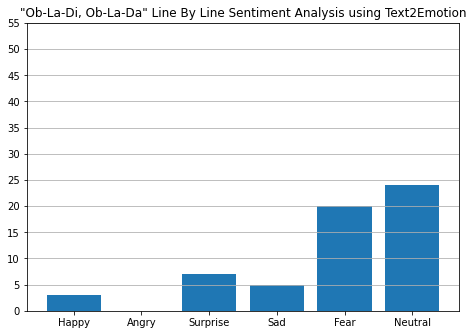

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear', 'Neutral']
compounds = [happy, angry, surprise, sad, fear, neu]
ax.bar(lbls, compounds)
ax.set_title('"Ob-La-Di, Ob-La-Da" Line By Line Sentiment Analysis using Text2Emotion')
ax.set_yticks(np.arange(0, lines, 5))
ax.grid(axis='y')
plt.show()

In [4]:
# The following code calculates the total emotion throughout the song
file1 = open('ob-la-di_ob-la-da.txt', 'r')

emotion = np.zeros((5, lines + 1), dtype=float) # a 5x15 array (5 emotions, 0:14 lines)

lines = 0
vec = [0,0,0,0,0]; 

for line in file1:
    b = line.strip()
    score = te.get_emotion(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate song as a whole later
        vec = [vec[0] + score['Happy'], vec[1] + score['Angry'], vec[2] + score['Surprise'], vec[3] + score['Sad'], vec[4] + score['Fear']]
    
        # evaluate song using equation similar to net sentiment rate
        for i in range(5) :
                emotion[i, lines] = vec[i] / lines
    
# Closing file(s)
file1.close()

In [5]:
print(vec) # the final sums of each emotion [Happy, Angry, Surprise, Sad, Fear]

[4.16, 0.66, 7.5, 5.08, 21.58]


In [6]:
print(vec.index(max(vec))) # the greatest emotion in Ob-La-Di, Ob-La-Da is Fear

4


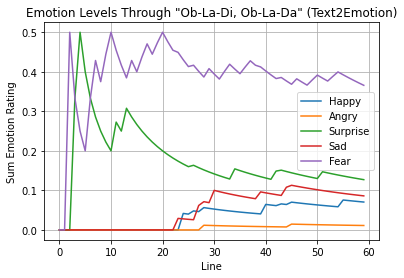

In [7]:
# increase of emotions throughout reading the song
plt.plot(emotion[0], label = 'Happy')
plt.plot(emotion[1], label = 'Angry')
plt.plot(emotion[2], label = 'Surprise')
plt.plot(emotion[3], label = 'Sad')
plt.plot(emotion[4], label = 'Fear')
plt.title('Emotion Levels Through "Ob-La-Di, Ob-La-Da" (Text2Emotion)')
plt.xlabel('Line')
plt.ylabel('Sum Emotion Rating')
plt.legend()
plt.grid(True)
plt.show()